[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W12/ArchGarch_Model.ipynb)

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def download_ts():  ### This dude will download the dataset from the directory directly!
  import requests
  url = "https://raw.githubusercontent.com/y-akbal/Tedu_Time_Series/main/W12/Index2018.csv"
  res = requests.get(url, allow_redirects=True)
  with open('Index2018.csv','wb') as file:
    file.write(res.content)
  print("Dataset downloaded!, the name of the time series is: Index2018.csv")
download_ts()
###pick up ftse column here! and work with difference instead of the time series itself.


Dataset downloaded!, the name of the time series is: Index2018.csv


In [4]:
ts = pd.read_csv('Index2018.csv')["ftse"]

In [19]:
ts_ = (ts.pct_change(1)*100)[1:]

In [6]:
from matplotlib import pyplot as plt

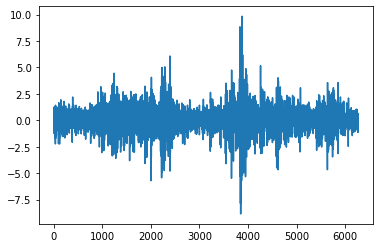

In [20]:
plt.plot(ts_)

In [13]:
import statsmodels
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

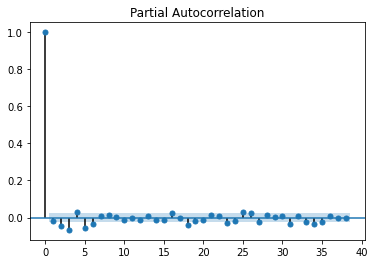

In [21]:
plot_pacf(ts_);

In [22]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [24]:
arma_order_select_ic(ts_, max_ar = 6, max_ma = 2, ic = ["bic","aic"])

{'bic':               0             1             2
 0  19198.360493  19205.040157  19198.423301
 1  19205.244131  19183.136892  19185.816856
 2  19199.326942  19185.566668  19194.132629
 3  19179.949463  19177.154169  19183.133939
 4  19182.988943  19185.567806  19185.616913
 5  19170.148793  19173.373961  19176.296057
 6  19170.075557  19178.581415  19184.952320,
 'aic':               0             1             2
 0  19184.874068  19184.810519  19171.450451
 1  19185.014493  19156.164042  19152.100793
 2  19172.354092  19151.850605  19153.673353
 3  19146.233400  19136.694893  19135.931451
 4  19142.529668  19138.365318  19131.671213
 5  19122.946304  19119.428261  19115.607143
 6  19116.129856  19117.892501  19117.520194,
 'bic_min_order': (6, 0),
 'aic_min_order': (5, 2)}

In [48]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(ts_, order = (27,0,0), enforce_stationarity= False)


In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6268
Model:                ARIMA(27, 0, 0)   Log Likelihood               -9528.369
Date:                Fri, 16 Dec 2022   AIC                          19114.737
Time:                        17:02:36   BIC                          19310.290
Sample:                             0   HQIC                         19182.497
                               - 6268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.012      1.559      0.119      -0.005       0.043
ar.L1         -0.0203      0.009     -2.335      0.020      -0.037      -0.003
ar.L2         -0.0466      0.008     -6.021      0.000      -0.062      -0.031
ar.L3         -0.0704      0.008     -9.041      0.000      -0.086      -0.055
ar.L4          0.0252      0.008      3.192      0.001       0.010       0.041
ar.L5         -0.0603      0.008     -7.641      0.000      -0.076      -0.045
ar.L6         -0.0366      0.008     -4.440      0.000      -0.053      -0.020
ar.L7          0.0092      0.008      1.088      0.277      -0.007       0.026
ar.L8          0.0142      0.009      1.642      0.101      -0.003       0.031
ar.L9         -0.0023      0.009     -0.273      0.785      -0.019       0.014
ar.L10        -0.0129      0.008     -1.608      0.108      -0.029       0.003
ar.L11        -0.0027      0.009     -0.300      0.764      -0.020       0.015
ar.L12        -0.0162      0.009     -1.898      0.058      -0.033       0.001
ar.L13         0.0039      0.009      0.439      0.661      -0.013       0.021
ar.L14        -0.0113      0.009     -1.210      0.226      -0.030       0.007
ar.L15        -0.0138      0.009     -1.609      0.108      -0.031       0.003
ar.L16         0.0208      0.009      2.373      0.018       0.004       0.038
ar.L17        -0.0065      0.009     -0.710      0.478      -0.025       0.012
ar.L18        -0.0410      0.009     -4.583      0.000      -0.058      -0.023
ar.L19        -0.0177      0.009     -2.012      0.044      -0.035      -0.000
ar.L20        -0.0119      0.010     -1.234      0.217      -0.031       0.007
ar.L21         0.0086      0.009      0.934      0.350      -0.009       0.027
ar.L22         0.0040      0.009      0.421      0.674      -0.015       0.023
ar.L23        -0.0264      0.009     -2.841      0.004      -0.045      -0.008
ar.L24        -0.0178      0.010     -1.794      0.073      -0.037       0.002
ar.L25         0.0282      0.009      3.116      0.002       0.010       0.046
ar.L26         0.0256      0.009      2.693      0.007       0.007       0.044
ar.L27        -0.0240      0.009     -2.576      0.010      -0.042      -0.006
sigma2         1.2243      0.013     96.476      0.000       1.199       1.249
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8309.12
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
A = [7,9,10,11,13,14,15,17,20,21,22]
with mod.fix_params({f"ar.L{i}":0 for i in A}):
  model = mod.fit()

AttributeError: ignored

In [81]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                   ftse   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8402.33
Distribution:                  Normal   AIC:                           16816.7
Method:            Maximum Likelihood   BIC:                           16857.1
                                        No. Observations:                 6268
Date:                Fri, Dec 16 2022   Df Residuals:                     6267
Time:                        17:26:30   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const          0.0419  1.033e-02      4.057  4.981e-05 [2.166e-02,6.217e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0154  4.562e-03      3.382  7.201e-04  [6.486e-03,2.437e-02]
alpha[1]       0.0730  1.721e-02      4.244  2.195e-05    [3.930e-02,  0.107]
alpha[2]       0.0327  2.522e-02      1.298      0.194 [-1.670e-02,8.214e-02]
beta[1]        0.7617      0.191      3.987  6.687e-05      [  0.387,  1.136]
beta[2]        0.1198      0.178      0.674      0.500      [ -0.229,  0.468]
=============================================================================

Covariance estimator: robust
"""

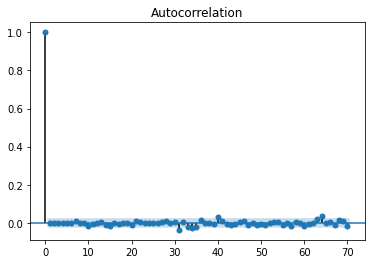

In [51]:
plot_acf(model.resid, lags = 70);

In [60]:
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch

In [53]:
acorr_ljungbox(model.resid, return_df = True, model_df = 16)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


,lb_stat,lb_pvalue
1,0.006232,NaN
2,0.007518,NaN
3,0.009375,NaN
4,0.014863,NaN
5,0.015764,NaN
6,0.017014,NaN
7,0.424330,NaN
8,0.429172,NaN
9,0.432877,NaN
10,1.597773,NaN


In [57]:
acorr_ljungbox(model.resid**2, return_df = True)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


,lb_stat,lb_pvalue
1,283.211199,1.499113e-63
2,756.436719,5.518912e-165
3,1365.051077,1.129164e-295
4,1814.012634,0.000000e+00
5,2332.834668,0.000000e+00
6,2633.863975,0.000000e+00
7,2927.834631,0.000000e+00
8,3151.176681,0.000000e+00
9,3505.141877,0.000000e+00
10,3912.547416,0.000000e+00


In [62]:
het_arch(model.resid) 

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:657: FutureWarning: The default value of nlags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setmaxlags or period to silence this warning.
  warnings.warn("The default value of nlags is changing.  After 0.12, "


(1546.739715982883, 1.0774115258753603e-303, 60.16457952227511, 0.0)

In [63]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 907 kB 12.8 MB/s 


In [72]:
from arch import arch_model

In [75]:
mod = arch_model(ts_, vol = "GARCH", mean = "AR", p = 2,  q = 2, )
model = mod.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 88678.94842628637
Iteration:      2,   Func. Count:     20,   Neg. LLF: 35938.46228048044
Iteration:      3,   Func. Count:     31,   Neg. LLF: 2110085812.1713347
Iteration:      4,   Func. Count:     39,   Neg. LLF: 8671.375179022518
Iteration:      5,   Func. Count:     47,   Neg. LLF: 12495.980787428547
Iteration:      6,   Func. Count:     57,   Neg. LLF: 8539.875097195996
Iteration:      7,   Func. Count:     65,   Neg. LLF: 8540.890328492542
Iteration:      8,   Func. Count:     73,   Neg. LLF: 8530.826075849229
Iteration:      9,   Func. Count:     81,   Neg. LLF: 8428.0346578371
Iteration:     10,   Func. Count:     89,   Neg. LLF: 8403.771107907738
Iteration:     11,   Func. Count:     97,   Neg. LLF: 8403.421337217984
Iteration:     12,   Func. Count:    105,   Neg. LLF: 8402.401852138795
Iteration:     13,   Func. Count:    112,   Neg. LLF: 8411.74685825568
Iteration:     14,   Func. Count:    120,   Neg. LLF: 8402.349021

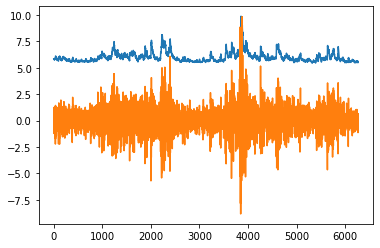

In [79]:
plt.plot(model.conditional_volatility+5)
plt.plot(ts_)

In [85]:
acorr_ljungbox(model.resid/model.conditional_volatility, return_df = True)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


,lb_stat,lb_pvalue
1,0.354870,0.551369
2,2.144696,0.342204
3,5.792429,0.122157
4,6.457428,0.167493
5,10.592025,0.060097
6,12.143552,0.058842
7,12.596843,0.082562
8,12.678856,0.123387
9,12.936912,0.165482
10,13.165018,0.214591
